In [1]:
# pip install geopandas

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import geopandas as gpd
from shapely.geometry import shape


In [3]:
df_substation = pd.read_csv("..\LIPA\Substation Directory Listing highlighted DACs Updated.csv")
# df_substation = pd.read_csv("\20231226 Substation Directory Listing highlighted DACs_Updated.csv")
df_substation.head()


Meters Served SUBSTATION  Highlight            NAME    PHONE NUMBER  \
0            NaN         2A        NaN      Park Place  (516) 897-1750   
1            NaN        2AB        NaN   Corona Avenue  (516) 823-2318   
2            NaN        2AR        NaN         Arverne  (718) 634-5419   
3            NaN        2BB        NaN        Broadway  (516) 792-2604   
4            NaN         2G        NaN  Rockaway Beach  (718) 634-4960   

          GRID                                  ADDRESS  \
0       018 20           782 Park Place, Long Beach, NY   
1    016 05 56   898 Franklin Ave., North Valley Stream   
2  010 05 4169  53-1 Rockaway Beach Blvd., Far Rockaway   
3    009 47 85            679 Central Avenue Cedarhurst   
4    022 38 47  10801 Beach Channel Drive Rockaway Park   

                                            LOCATION    GPS LAT   GPS LONG  \
0  N/Side Park Place, W/O Long Beach Blvd., E/O R...  40.593658 -73.658098   
1  On Hospital Grounds, W/O Franklin Avenue, Nort...  40.681935 -73.686901   
2         Rockaway Beach Blvd and Beach 53rd. Street  40.592634 -73.783284   
3  LIPA ROW, N/S Grove Avenue, S/O Central Avenue...  40.625152 -73.718879   
4  S/S Beach Channel Drive, W/O Beach 108th Stree...  40.583025 -73.833666   

                 Concat    AREA  DAC                     Unnamed: 13  
0  40.593658,-73.658098  NASSAU  Yes  Sub station updated post Sandy  
1  40.681935,-73.686901  NASSAU   No                             NaN  
2  40.592634,-64.783227  NASSAU  Yes  Sub station updated post Sandy  
3  40.625152,-73.718879  NASSAU   No                             NaN  
4  40.583025,-73.833666  NASSAU  Yes  Sub station updated post Sandy

In [4]:
len(df_substation)

193

In [5]:
# There are five substations without location data
df_null = df_substation[df_substation['GPS LAT'].isnull()]
df_null

Meters Served SUBSTATION  Highlight               NAME PHONE NUMBER GRID  \
7              NaN        T21        NaN  Rockaway Ave Term          NaN  NaN   
75             NaN        5RS        NaN  Round Swamp - NEW          NaN  NaN   
77             NaN        T53        NaN     Plainview Term          NaN  NaN   
134            NaN        8CS        NaN      Cooper Street          NaN  NaN   
187            NaN        9NR        NaN    Navy Road - NEW          NaN  NaN   

                       ADDRESS  \
7                          NaN   
75                         NaN   
77                         NaN   
134  24 Cooper Street Shoreham   
187                        NaN   

                                              LOCATION  GPS LAT  GPS LONG  \
7                                                  NaN      NaN       NaN   
75   Corner of Round Swamp Road and Old Country Roa...      NaN       NaN   
77                                                 NaN      NaN       NaN   
134                             Shoreham Solar Commons      NaN       NaN   
187  Shore Road, south of Navy Road and the LIRR\nM...      NaN       NaN   

    Concat             AREA    DAC Unnamed: 13  
7        ,           NASSAU  blank         NaN  
75       ,              NaN  blank         NaN  
77       ,           NASSAU  blank         NaN  
134      ,  Eastern Suffolk  blank         NaN  
187      ,              NaN  blank         NaN

In [6]:
df_substation.dtypes

Meters Served    float64
SUBSTATION        object
Highlight        float64
NAME              object
PHONE NUMBER      object
GRID              object
ADDRESS           object
LOCATION          object
GPS LAT          float64
GPS LONG         float64
Concat            object
AREA              object
DAC               object
Unnamed: 13       object
dtype: object

In [7]:
# from shapely.geometry import Point

In [8]:
# geometry = [Point (lon, lat) for lon, lat in zip(df_substation['GPS LAT'],df_substation['GPS LONG'])]
# gdf = gpd.GeoDataFrame(df_substation, crs="EPSG:4326", geometry=geometry)
# gdf.head()

In [9]:
# import contextily as ctx
# from pyproj import CRS


# Interactive Map of the identified substations

In [10]:
import folium

In [11]:
basemap = folium.Map(location=[40.7891, -73.1350], default_zoom_start=12, tiles='cartodbdark_matter')
basemap

In [12]:
basemap.crs

'EPSG3857'

# Overlay with DACs from 2023
### https://data.ny.gov/en/Energy-Environment/Final-Disadvantaged-Communities-DAC-2023-Map/6mn4-5vvz
### https://data.ny.gov/Energy-Environment/Final-Disadvantaged-Communities-DAC-2023/2e6c-s6fp/about_data

In [13]:
# import fiona

# Trial 1: shapefile to GeoJSON
# gdf_dac = gpd.read_file("..\LIPA\Final_DAC_Attributes.shp")
# # gdf_dac.plot()

# #Convert the shapefile into GeoJSON
# geojson_dac_filename = 'output.geojson'

# # gdf_dac.to_file(geojson_dac_filename, driver='GeoJSON')

# # make GeoJSON into overlay
# geojson_layer = folium.GeoJson(
#     geojson_dac_filename, 
#     name='output.geojson', style_function = lambda feature: {
#         'fillColor':'blue',
#         'color':'white',
#         'weight':1,
#         'fillOpacity':5
#     })

# geojson_layer.add_to(basemap)

# basemap

# # Show the map
# basemap.save("map_with_colored_DAC_geojson.html")  # Save the map to an HTML file
# basemap

###### doesn't show the boundaries

In [14]:
# Use with CSV from the filtered map export

df_dac = pd.read_csv('..\LIPA\Final_Disadvantaged_Communities__DAC__2023_20231227.csv')
df_dac.head()
len(df_dac)

1276

In [15]:
# Make a new dataframe for those that are designated as DAC
df_dac = df_dac[(df_dac['DAC_Designation'] == 'Designated as DAC')]
len(df_dac)

298

In [16]:
df_dac.head()

the_geom        GEOID  \
2  MULTIPOLYGON (((-73.79202899999999 40.71106899...  36081046200   
3  MULTIPOLYGON (((-73.87468499999999 40.74334899...  36081046300   
5  MULTIPOLYGON (((-73.87237299999998 40.74885199...  36081046500   
7  MULTIPOLYGON (((-73.87824199999999 40.74239699...  36081046700   
9  MULTIPOLYGON (((-73.88033699999998 40.74253399...  36081046900   

     DAC_Designation           REDC  County      City_Town NYC_Region  \
2  Designated as DAC  New York City  Queens  New York city        NYC   
3  Designated as DAC  New York City  Queens  New York city        NYC   
5  Designated as DAC  New York City  Queens  New York city        NYC   
7  Designated as DAC  New York City  Queens  New York city        NYC   
9  Designated as DAC  New York City  Queens  New York city        NYC   

  Urban_Rural Tribal_Designation Household_Low_Count_Flag  ...  \
2       urban                 No                       No  ...   
3       urban                 No                       No  ...   
5       urban                 No                       No  ...   
7       urban                 No                       No  ...   
9       urban                 No                       No  ...   

   MI_Hospitalization_Rate  Health_Insurance_Rate  Age_Over_65  \
2                 0.901915               0.896935     0.403641   
3                 0.037887               0.972082     0.163633   
5                 0.037887               0.997061     0.162796   
7                 0.037887               0.960747     0.516845   
9                 0.037887               0.865659     0.301109   

   Premature_Deaths  Internet_Access  Home_Energy_Affordability  \
2          0.818373         0.739176                   0.825241   
3          0.669540         0.305591                   0.825241   
5          0.669540         0.745902                   0.825241   
7          0.669540         0.827238                   0.584973   
9          0.669540         0.812106                   0.584973   

   Homes_Built_Before_1960  Mobile_Homes  Rent_Percent_Income  Renter_Percent  
2                 0.258159           0.0             0.940678        0.795226  
3                 0.578661           0.0             0.882839        0.682370  
5                 0.889121           0.0             0.613559        0.817420  
7                 0.538075           0.0             0.949364        0.929020  
9                 0.726360           0.0             0.663983        0.869347  

[5 rows x 65 columns]

In [17]:
# turn into GeoDataFrame
gdf_dac = gpd.GeoDataFrame(df_dac, geometry=gpd.GeoSeries.from_wkt(df_dac['the_geom']))
gdf_dac.head()
# len(gdf_dac)

the_geom        GEOID  \
2  MULTIPOLYGON (((-73.79202899999999 40.71106899...  36081046200   
3  MULTIPOLYGON (((-73.87468499999999 40.74334899...  36081046300   
5  MULTIPOLYGON (((-73.87237299999998 40.74885199...  36081046500   
7  MULTIPOLYGON (((-73.87824199999999 40.74239699...  36081046700   
9  MULTIPOLYGON (((-73.88033699999998 40.74253399...  36081046900   

     DAC_Designation           REDC  County      City_Town NYC_Region  \
2  Designated as DAC  New York City  Queens  New York city        NYC   
3  Designated as DAC  New York City  Queens  New York city        NYC   
5  Designated as DAC  New York City  Queens  New York city        NYC   
7  Designated as DAC  New York City  Queens  New York city        NYC   
9  Designated as DAC  New York City  Queens  New York city        NYC   

  Urban_Rural Tribal_Designation Household_Low_Count_Flag  ...  \
2       urban                 No                       No  ...   
3       urban                 No                       No  ...   
5       urban                 No                       No  ...   
7       urban                 No                       No  ...   
9       urban                 No                       No  ...   

   Health_Insurance_Rate  Age_Over_65  Premature_Deaths  Internet_Access  \
2               0.896935     0.403641          0.818373         0.739176   
3               0.972082     0.163633          0.669540         0.305591   
5               0.997061     0.162796          0.669540         0.745902   
7               0.960747     0.516845          0.669540         0.827238   
9               0.865659     0.301109          0.669540         0.812106   

   Home_Energy_Affordability  Homes_Built_Before_1960  Mobile_Homes  \
2                   0.825241                 0.258159           0.0   
3                   0.825241                 0.578661           0.0   
5                   0.825241                 0.889121           0.0   
7                   0.584973                 0.538075           0.0   
9                   0.584973                 0.726360           0.0   

   Rent_Percent_Income  Renter_Percent  \
2             0.940678        0.795226   
3             0.882839        0.682370   
5             0.613559        0.817420   
7             0.949364        0.929020   
9             0.663983        0.869347   

                                            geometry  
2  MULTIPOLYGON (((-73.79203 40.71107, -73.79101 ...  
3  MULTIPOLYGON (((-73.87468 40.74335, -73.87423 ...  
5  MULTIPOLYGON (((-73.87237 40.74885, -73.87184 ...  
7  MULTIPOLYGON (((-73.87824 40.74240, -73.87768 ...  
9  MULTIPOLYGON (((-73.88034 40.74253, -73.87981 ...  

[5 rows x 66 columns]

In [18]:
# the shapefile didn't assign a crs
from pyproj import CRS

# make the CRS the same to WebMercator, since NYS Open Data uses MapBox
folium_crs = 'EPSG:3857'

gdf_dac.crs = folium_crs

print(gdf_dac.crs)

EPSG:3857


In [19]:
# convert shapefile to geojson
multi_polygon_geojson = gdf_dac.to_json()

In [20]:
# add polygon geojson to layer
folium.GeoJson(multi_polygon_geojson,
               crs= folium_crs,
              name='DAC boundaries',
              style_function = lambda feature: {
        'fillColor':'white',
        'color':'white',
        'weight':0.3,
        'fillOpacity':0.3
    }).add_to(basemap)

basemap

In [21]:
print(basemap.crs)

EPSG3857


## Add the substation locations


In [22]:
df_substation = df_substation[df_substation['GPS LAT'].notnull()]


In [23]:
len(df_substation)
#used  to be 193 (Five NAs in Lat)

188

# Categorize substations by: 
## 1.) the six substations identified by LIPA to be priority: cyan
## 2.) substations that do not have meters served (i.e. 'nan' or '0'): dark green
## 3.) substations that are in DACs: yellow

In [24]:
print(df_substation['Highlight'].unique())

[nan  1.  2.]


In [25]:
# define style function for different colors
def style_function(row):
    color = 'green'
    
    if row['Highlight'] == 1.:
        color = 'yellow'
    elif row['Highlight'] == 2.: 
        color = 'orange'
        
    return color

# Construct the content for the popup
for idx, row in df_substation.iterrows():
    tooltip_text = f"<b>Name:</b> {row['NAME']}<br>" \
                 f"<b>DAC?:</b> {row['DAC']}<br>" \
                 f"<b>Substation Number:</b> {row['SUBSTATION']}<br>"\
                f"<b>Meters Served:</b> {row['Meters Served']}<br>"
    
    folium.CircleMarker(location=[row['GPS LAT'], row['GPS LONG']],
                       radius=3.2,
                        color = style_function(row),
                        fill = True,
                        tooltip=tooltip_text,
                       opacity=0.9).add_to(basemap)
    
# Show the map
basemap.save("map_with_substations_DAC.html")  # Save the map to an HTML file
basemap

# Heat Map of substations to determine proximity to DACs based on density of substations


In [26]:
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [27]:
# marker_cluster = FastMarkerCluster(data=list(zip(df_substation['GPS LAT'], df_substation['GPS LONG']))).add_to(basemap)

# basemap

m = folium.Map(
    location=[np.mean(df_substation['GPS LAT']), np.mean(df_substation['GPS LONG'])],
    tiles='Cartodb Positron',
    zoom_start=9
)

                                  
#     tooltip_text = f"<b>Name:</b> {row['NAME']}<br>" \
#                  f"<b>DAC?:</b> {row['DAC']}<br>" \
#                  f"<b>Substation Number:</b> {row['SUBSTATION']}<br>"\
#                 f"<b>Meters Served:</b> {row['Meters Served']}<br>"
    

    

# marker_cluster = MarkerCluster(
#     overlay=True,
#     control=False,
#     icon_create_function=None
# )

# for k in range(df_substation):
#     location = (df_substation['GPS LAT'])[k], (df_substation['GPS LONG'])[k]
#     marker = folium.Marker(location=location)
#     popup = 'lon:{}<br>lat:{}'.format(location[1], location[0])
#     folium.Popup(popup).add_to(marker)
#     marker_cluster.add_child(marker)

# marker_cluster.add_to(m)

# folium.LayerControl().add_to(m);

# m

# Overlay of Different Social Vulnerability Indices and other considerations for parameters

## CEJST (census-level)

In [28]:
# # Load Long Island shapefile and Cejst data
# target_crs = 'EPSG:3857'

# counties = ['Nassau County','Suffolk County','Queens County']

# gdf_cejst = gdf_cejst[(gdf_cejst['CF'].isin(counties)) & (gdf_cejst['SF']=='New York')]

# len(gdf_cejst)

# gdf_cejst.to_file('..\LIPA\cejst_longIsland.shp')

gdf_cejst = gpd.read_file("..\LIPA\cejst_longIsland.shp").to_crs(folium_crs)

gdf_cejst.head()

GEOID10        SF             CF  DF_PFS  AF_PFS  HDF_PFS  DSF_PFS  \
0  36081036100  New York  Queens County    0.84    0.49     0.39     0.99   
1  36081036300  New York  Queens County    0.65    0.32     0.14     0.99   
2  36081037100  New York  Queens County    0.84    0.43     0.41     0.99   
3  36081037700  New York  Queens County    0.48    0.24     0.09     0.99   
4  36081037900  New York  Queens County    0.56    0.29     0.10     0.99   

   EBF_PFS  EALR_PFS  EBLR_PFS  ...  AGE_10  AGE_MIDDLE  AGE_OLD  TA_COU_116  \
0     0.83       NaN      0.11  ...    0.14        0.73     0.12        None   
1     0.80       NaN      0.11  ...    0.18        0.72     0.09        None   
2     0.84       NaN      0.12  ...    0.10        0.70     0.19        None   
3     0.68       NaN      0.11  ...    0.20        0.73     0.05        None   
4     0.57       NaN      0.11  ...    0.17        0.73     0.09        None   

   TA_COUNT_C  TA_PERC  TA_PERC_FE  UI_EXP  THRHLD  \
0        None     None        None  Nation      21   
1        None     None        None  Nation      21   
2        None     None        None  Nation      21   
3        None     None        None  Nation      21   
4        None     None        None  Nation      21   

                                            geometry  
0  POLYGON ((-8223253.941 4976856.447, -8223216.8...  
1  POLYGON ((-8222976.532 4977271.334, -8222962.7...  
2  POLYGON ((-8222035.215 4977288.529, -8222058.0...  
3  POLYGON ((-8223049.001 4976115.631, -8223148.7...  
4  POLYGON ((-8222192.398 4976114.455, -8222237.9...  

[5 rows x 124 columns]

In [29]:
print(basemap.crs)

EPSG3857


In [30]:
print(gdf_cejst.crs)

EPSG:3857


<Axes: >

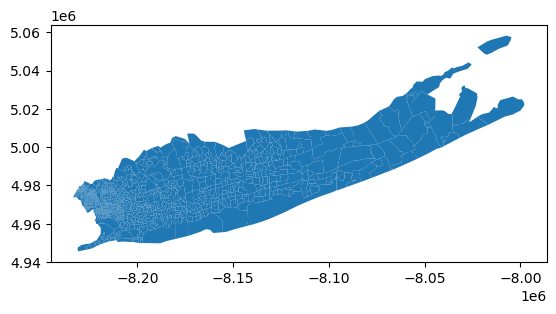

In [31]:
gdf_cejst.plot()

In [32]:
# gdf_cejst.head()

In [33]:
# gdf_cejst.columns.tolist()

In [34]:
n = folium.Map(location=[40.7891, -73.1350], default_zoom_start=12, tiles='cartodbdark_matter')

folium.GeoJson(geojson_cejst).add_to(n)
n

NameError: name 'geojson_cejst' is not defined

In [ ]:
# Add cejst to basemap

geojson_cejst = gdf_cejst.to_json()

# add polygon geojson to layer
folium.GeoJson(geojson_cejst,
               crs= folium_crs,
              style_function = lambda feature: {
        'fillColor':'cyan',
        'color':'dimgrey',
        'weight':0.3,
        'fillOpacity':0.3
    }).add_to(basemap)

basemap

In [ ]:
# Workforce development
# Communities are identified as disadvantaged if they are in census tracts that:
# ARE at or above the 90th percentile for linguistic isolation OR low median income OR poverty OR unemployment
# AND more than 10% of people ages 25 years or older whose high school education is less than a high school diploma